In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
df = pd.read_csv('WMT.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.set_index(['Year', 'Quarter'], inplace=True)

In [39]:
df['xt'] = np.log(df['WMT'])
df['∆xt'] = df['xt'].diff()
df['∆4xt'] = df['xt'].diff(4)

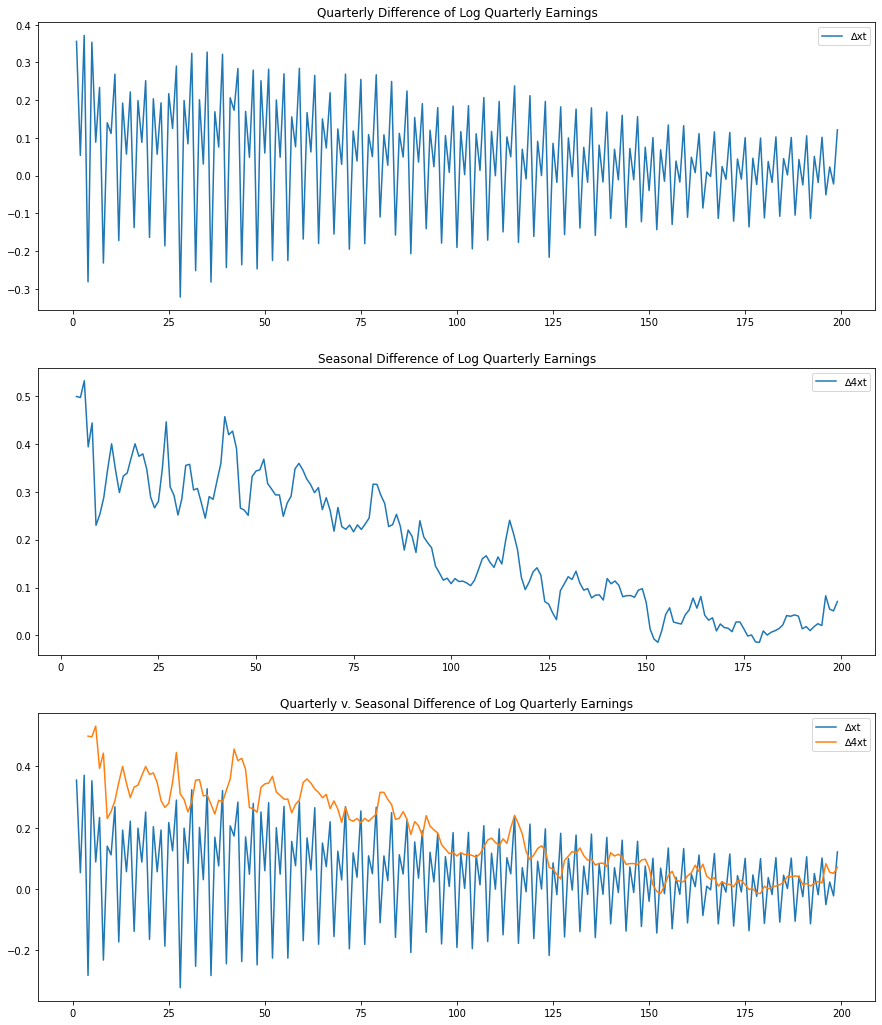

In [40]:
df_plot = df.reset_index()
plt.figure(figsize=(15, 18))

plt.subplot(3, 1, 1)
plt.plot(df_plot['∆xt'], label='∆xt')
plt.title('Quarterly Difference of Log Quarterly Earnings')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(df_plot['∆4xt'], label='∆4xt')
plt.title('Seasonal Difference of Log Quarterly Earnings')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(df_plot['∆xt'], label='∆xt')
plt.plot(df_plot['∆4xt'], label='∆4xt')
plt.title('Quarterly v. Seasonal Difference of Log Quarterly Earnings')
plt.legend()

plt.savefig('plot1.png')
plt.show()

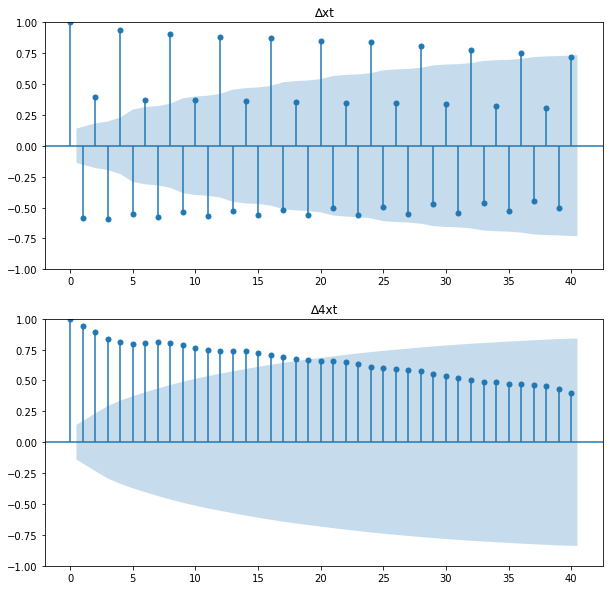

In [41]:
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)
plot_acf(df['∆xt'].dropna(), lags=40, ax=plt.gca(), title='∆xt')

plt.subplot(2, 1, 2)
plot_acf(df['∆4xt'].dropna(), lags=40, ax=plt.gca(), title='∆4xt')

plt.savefig('plot2.png')
plt.show()

In [42]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
start = (1971, 1)
end = (2015, 4)

model1 = SARIMAX(df[start:end]['xt'], order=(0,1,1), trend='c')
result1 = model1.fit()
result1.summary()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                     xt   No. Observations:                  180
Model:               SARIMAX(0, 1, 1)   Log Likelihood                 107.158
Date:                Sat, 27 Apr 2024   AIC                           -208.317
Time:                        16:42:50   BIC                           -198.755
Sample:                             0   HQIC                          -204.439
                                - 180                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0506      0.006      8.044      0.000       0.038       0.063
ma.L1         -0.4920      0.071     -6.891      0.000      -0.632      -0.352
sigma2         0.0177      0.002      7.602      0.000       0.013       0.022
===================================================================================
Ljung-Box (L1) (Q):                   5.34   Jarque-Bera (JB):                10.99
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):               0.39   Skew:                             0.57
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [43]:
model2 = SARIMAX(df[start:end]['xt'], order=(0,1,1), seasonal_order=(0,1,1,4))
result2 = model2.fit()
result2.summary()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                xt   No. Observations:                  180
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 4)   Log Likelihood                 336.289
Date:                           Sat, 27 Apr 2024   AIC                           -666.578
Time:                                   16:42:50   BIC                           -657.083
Sample:                                        0   HQIC                          -662.727
                                           - 180                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1590      0.077     -2.052      0.040      -0.311      -0.007
ma.S.L4       -0.4837      0.081     -5.942      0.000      -0.643      -0.324
sigma2         0.0012    7.4e-05     16.851      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.41   Jarque-Bera (JB):               397.03
Prob(Q):                              0.52   Prob(JB):                         0.00
Heteroskedasticity (H):               0.15   Skew:                            -1.00
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [58]:
df['pred1'] = np.nan
for i in range(180, 196):
    train = df.iloc[:i]['xt']
    model = SARIMAX(train, order=(0,1,1), trend='c')
    result = model.fit()
    pred = result.predict(start=i, end=i)
    df['pred1'].iloc[i] = pred
    
df['pred2'] = np.nan
for i in range(180, 196):
    train = df.iloc[:i]['xt']
    model = SARIMAX(train, order=(0,1,1), seasonal_order=(0,1,1,4))
    result = model.fit()
    pred = result.predict(start=i, end=i)
    df['pred2'].iloc[i] = pred
print(df[180:196])

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: Val

                   WMT         xt       ∆xt      ∆4xt      pred1      pred2
Year Quarter                                                               
2016 1        115904.0  11.660518 -0.112207  0.009344  11.828816  11.648711
     2        120319.0  11.697902  0.037384  0.000748  11.792415  11.699582
     3        118179.0  11.679956 -0.017946  0.006545  11.793254  11.681988
     4        130936.0  11.782464  0.102508  0.009739  11.783806  11.783846
2017 1        117542.0  11.674551 -0.107913  0.014033  11.832613  11.663917
     2        122968.0  11.719679  0.045128  0.021778  11.799404  11.711954
     3        123179.0  11.721394  0.001714  0.041438  11.806463  11.701358
     4        136267.0  11.822371  0.100978  0.039908  11.810396  11.821252
2018 1        122690.0  11.717416 -0.104955  0.042865  11.865312  11.709004
     2        128028.0  11.760004  0.042588  0.040325  11.835959  11.758284
     3        124894.0  11.735221 -0.024784  0.013827  11.843907  11.752314
     4      

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: Val

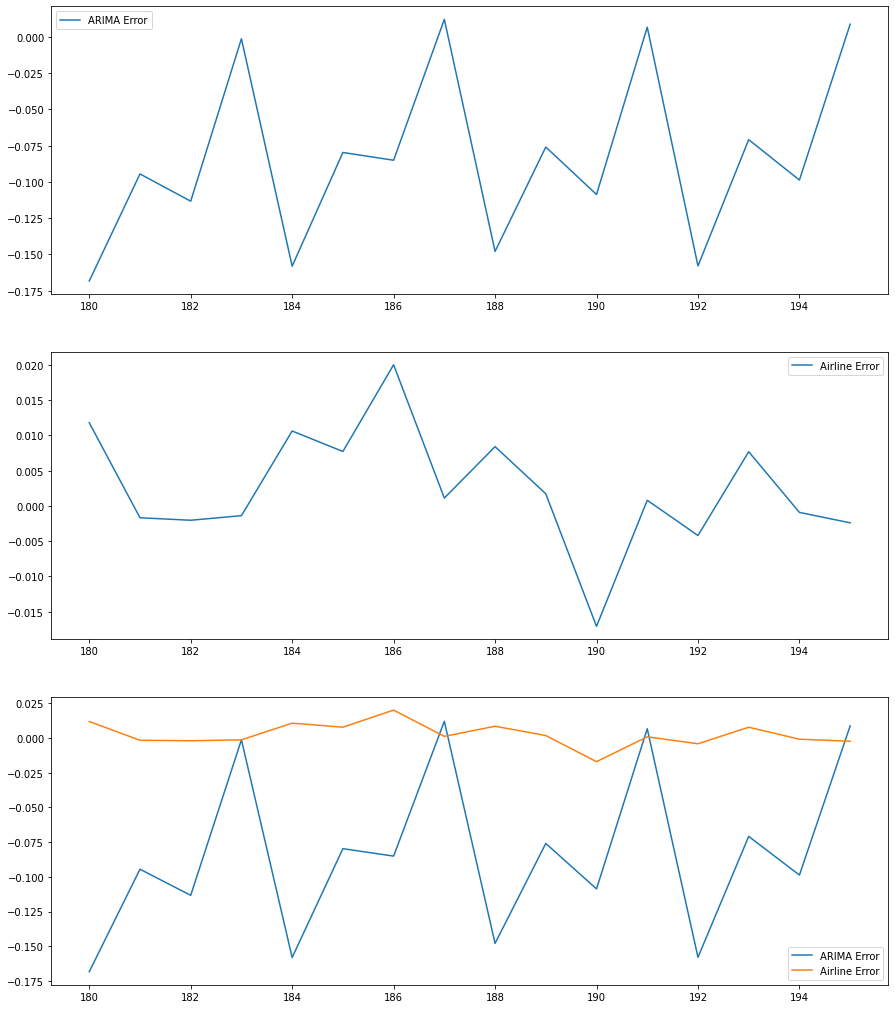

In [65]:
df['error1'] = df['xt'] - df['pred1']
df['error2'] = df['xt'] - df['pred2']

df_plot = df.reset_index()
plt.figure(figsize=(15, 18))
plt.subplot(3, 1, 1)
plt.plot(df_plot['error1'], label='ARIMA Error')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(df_plot['error2'], label='Airline Error')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(df_plot['error1'], label='ARIMA Error')
plt.plot(df_plot['error2'], label='Airline Error')
plt.legend()

plt.savefig('plot3.png')
plt.show()

In [67]:
from sklearn.metrics import mean_squared_error as mse
print(mse(df['xt'][180:196], df['pred1'][180:196]))
print(mse(df['xt'][180:196], df['pred2'][180:196]))

0.010506220354097245
7.335482746216151e-05
